<a href="https://colab.research.google.com/github/Tapanmittal13/Data_Science/blob/master/EVA_1st_DNN_MNIST_20K%20params_99.4%20acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


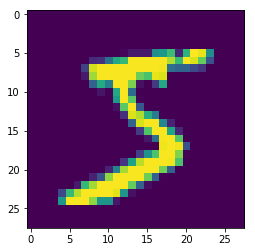

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
#from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Convolution2D(16,3,activation='relu', input_shape=(28,28,1)))
#model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,3,activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(32,3,activation='relu'))
#model.add(Convolution2D(64, 3, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Convolution2D(13,1,activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10,5))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 10, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50,validation_split=0.2, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 20s 413us/step - loss: 0.2519 - acc: 0.9223 - val_loss: 0.1051 - val_acc: 0.9750
Epoch 2/50
48000/48000 [==============================] - 19s 395us/step - loss: 0.0838 - acc: 0.9737 - val_loss: 0.0747 - val_acc: 0.9798
Epoch 3/50
48000/48000 [==============================] - 19s 394us/step - loss: 0.0648 - acc: 0.9796 - val_loss: 0.0535 - val_acc: 0.9866
Epoch 4/50
48000/48000 [==============================] - 19s 395us/step - loss: 0.0554 - acc: 0.9830 - val_loss: 0.0713 - val_acc: 0.9835
Epoch 5/50
48000/48000 [==============================] - 19s 395us/step - loss: 0.0478 - acc: 0.9852 - val_loss: 0.0685 - val_acc: 0.9842
Epoch 6/50
48000/48000 [==============================] - 19s 396us/step - loss: 0.0444 - acc: 0.9859 - val_loss: 0.0554 - val_acc: 0.9871
Epoch 7/50
48000/48000 [==============================] - 19s 398us/step - loss: 0.0434 - acc: 0.9864 - val_loss: 0.

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50,validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
  512/48000 [..............................] - ETA: 17s - loss: 0.0190 - acc: 0.9902

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


48000/48000 [==============================] - 19s 393us/step - loss: 0.0161 - acc: 0.9942 - val_loss: 0.0275 - val_acc: 0.9933
Epoch 2/50
48000/48000 [==============================] - 19s 395us/step - loss: 0.0157 - acc: 0.9951 - val_loss: 0.0323 - val_acc: 0.9923
Epoch 3/50
48000/48000 [==============================] - 19s 395us/step - loss: 0.0172 - acc: 0.9938 - val_loss: 0.0321 - val_acc: 0.9921
Epoch 4/50
48000/48000 [==============================] - 19s 395us/step - loss: 0.0142 - acc: 0.9952 - val_loss: 0.0287 - val_acc: 0.9932
Epoch 5/50
48000/48000 [==============================] - 19s 395us/step - loss: 0.0158 - acc: 0.9945 - val_loss: 0.0316 - val_acc: 0.9922
Epoch 6/50
48000/48000 [==============================] - 19s 394us/step - loss: 0.0161 - acc: 0.9949 - val_loss: 0.0277 - val_acc: 0.9927
Epoch 7/50
48000/48000 [==============================] - 19s 395us/step - loss: 0.0156 - acc: 0.9947 - val_loss: 0.0285 - val_acc: 0.9918
Epoch 8/50
48000/48000 [==============

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=25,validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
  512/48000 [..............................] - ETA: 17s - loss: 0.0038 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


48000/48000 [==============================] - 19s 393us/step - loss: 0.0111 - acc: 0.9962 - val_loss: 0.0277 - val_acc: 0.9927
Epoch 2/25
48000/48000 [==============================] - 19s 394us/step - loss: 0.0120 - acc: 0.9959 - val_loss: 0.0294 - val_acc: 0.9931
Epoch 3/25
48000/48000 [==============================] - 19s 394us/step - loss: 0.0109 - acc: 0.9963 - val_loss: 0.0270 - val_acc: 0.9925
Epoch 4/25
48000/48000 [==============================] - 19s 394us/step - loss: 0.0110 - acc: 0.9961 - val_loss: 0.0274 - val_acc: 0.9927
Epoch 5/25
48000/48000 [==============================] - 19s 395us/step - loss: 0.0092 - acc: 0.9969 - val_loss: 0.0269 - val_acc: 0.9928
Epoch 6/25
48000/48000 [==============================] - 19s 403us/step - loss: 0.0122 - acc: 0.9956 - val_loss: 0.0265 - val_acc: 0.9937
Epoch 7/25
48000/48000 [==============================] - 19s 397us/step - loss: 0.0115 - acc: 0.9960 - val_loss: 0.0264 - val_acc: 0.9928
Epoch 8/25
48000/48000 [==============

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.01975430347621441, 0.9942]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.08469765e-12 1.74209553e-08 4.04730599e-07 9.95132609e-07
  7.57678087e-11 2.69741535e-10 8.46827012e-16 9.99997139e-01
  6.72160549e-09 1.41393173e-06]
 [7.89325085e-08 6.99437635e-07 9.99998808e-01 1.69466130e-09
  2.88288907e-11 6.79525609e-14 1.79309879e-07 1.50426249e-08
  2.21045737e-09 6.02972747e-08]
 [8.76951731e-07 9.98776019e-01 1.74175148e-06 1.99057322e-08
  6.55263430e-04 1.70273813e-06 1.28670712e-04 4.16624011e-04
  1.62144461e-05 2.84044063e-06]
 [9.99498487e-01 1.27934247e-10 1.44961166e-06 1.17431425e-08
  3.39013191e-08 3.95525092e-07 4.93488857e-04 1.27710553e-08
  1.59779700e-06 4.58574141e-06]
 [1.12203391e-09 9.18441490e-10 5.60895774e-10 2.85010748e-11
  9.99918938e-01 4.63085126e-11 1.09415282e-07 2.01598844e-08
  1.76222409e-06 7.91937637e-05]
 [3.49602391e-09 9.98648703e-01 1.02822725e-07 1.93066452e-10
  8.17313790e-04 6.87703539e-09 1.29153523e-06 5.29065321e-04
  1.79136032e-06 1.80467839e-06]
 [5.88642879e-15 5.85836668e-09 3.40441719e-09 1.18526066e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

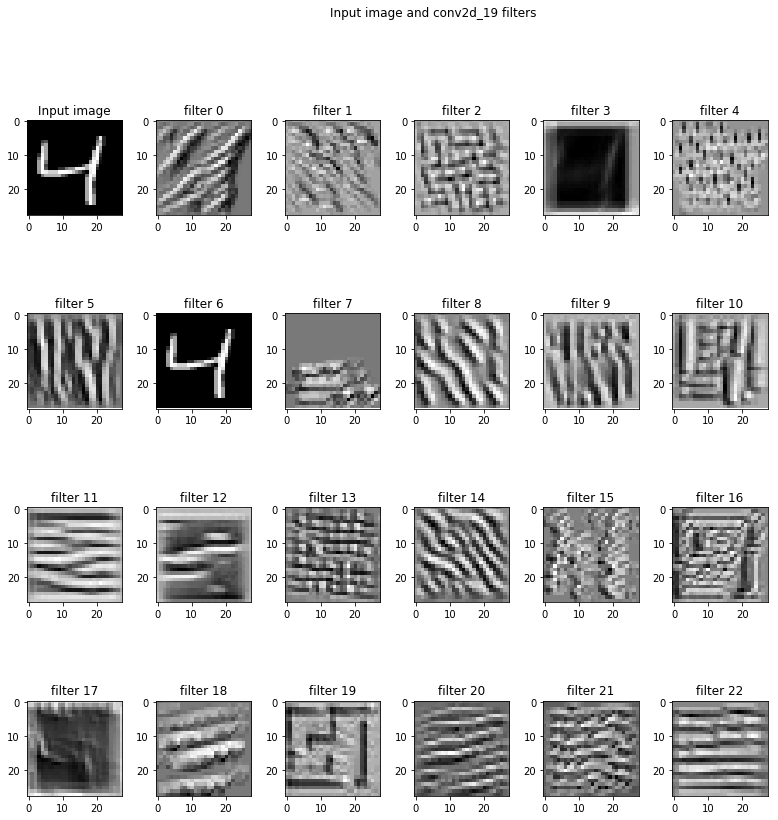

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_19'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()